# my5-vs-cygnus-default
8/29/2023

Compare Cygnus to my5.
- Using new Naboo scripts
- Using default build config (100M warmup + 200M sim)

In [6]:
import os
import sys
sys.path.append(os.path.abspath("../../"))

from collections import defaultdict
from importlib import reload
from matplotlib import colormaps
import pandas as pd
# from utils import plots, stats, tables, utils

from plot_utils import collate, plot

# Configuration

In [2]:
sim_dir = "/u/cmolder/GitHub/ChampSim/sim/default"
baseline_study = "stu_prefetchers"
baseline_experiment = "_baseline"
weights_path = "/u/cmolder/GitHub/ChampSim/naboo/conf/weights.toml"

suites = [
    "spec06",
    "spec17",
    "cloudsuite",
    "gap",
    "gap_real"
]
stats  = [
    "cpu.gmean.ipc_improvement",
]
dpi = 150

In [3]:
reload(collate)
studies = {
    # Baseline
    "stu_prefetchers": collate.StudyCollator(sim_dir, "stu_prefetchers", 
                                             baseline_study=baseline_study, 
                                             baseline_experiment=baseline_experiment,
                                             weights_path=weights_path),
}

[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 3608/3608 [00:40<00:00, 88.45file/s] 


[ipykernel_launcher][angrist-3] Generating benchmark stats for 121 benchmarks over 11 experiments:
    Benchmarks : pr__amazon0601.mtx bc__coAuthorsDBLP.mtx cc__wikipedia-20060925.mtx lbm bwaves pr__coPapersDBLP.mtx cc__cnr-2000.mtx pr__coAuthorsCiteseer.mtx bc bc__sx-stackoverflow_A2Q.mtx delta bc__in-2004.mtx pr__luxembourg_osm.mtx sphinx3 bfs__netherlands_osm.mtx cc__flickr.mtx pr__eu-2005.mtx cc__citationCiteseer.mtx bc__wiki-topcats.mtx cc__com-Youtube.mtx 649.fotonik3d charlie cc__sx-stackoverflow_A2Q.mtx xalancbmk pr__citationCiteseer.mtx cc__soc-LiveJournal1.mtx pr__web-Google.mtx pr__in-2004.mtx bc__citationCiteseer.mtx pr__flickr.mtx pr__amazon-2008.mtx cc__dblp-2010.mtx pr__sx-stackoverflow_C2Q.mtx milc pr__netherlands_osm.mtx GemsFDTD cc__wiki-topcats.mtx cc bc__sx-stackoverflow_C2Q.mtx 627.cam4 classifcation bfs__belgium_osm.mtx pr__coPapersCiteseer.mtx gcc bfs__citationCiteseer.mtx pr tc bc__netherlands_osm.mtx cc__in-2004.mtx bc__amazon0601.mtx pr__sx-stackoverflow_A2Q.m

[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 1331/1331 [00:05<00:00, 235.56it/s]


[ipykernel_launcher][angrist-3] Generating suite stats for 7 suites over 11 experiments:
    Suites     : google cloudsuite all spec17 gap gap_real spec06
    Experiments: pf_mlop pf_spp pf_dspatch pf_cygnus_depth pf_pythia pf_sms pf_spp_ppf pf_my5 pf_bingo pf_cygnus _baseline
        


[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 77/77 [00:06<00:00, 11.65it/s]


# Dynamic degree

In [4]:
degreedyn_1core_df = {
    'Cygnus':       studies['stu_prefetchers']['pf_cygnus'],
    'Cygnus Depth': studies['stu_prefetchers']['pf_cygnus_depth'],
    'Pythia':       studies['stu_prefetchers']['pf_pythia'],
    #'Bingo':   studies['stu_prefetchers']['pf_bingo'],
    #'SMS':     studies['stu_prefetchers']['pf_sms'],
    #'SPP':     studies['stu_prefetchers']['pf_spp'],
    'SPP+PPF': studies['stu_prefetchers']['pf_spp_ppf'],
    #'MLOP':    studies['stu_prefetchers']['pf_mlop'],
    #'DSPatch': studies['stu_prefetchers']['pf_dspatch'],
    'my5':     studies['stu_prefetchers']['pf_my5'],
}
degreedyn_1core_colors = defaultdict(lambda: None, {
    'Cygnus':       colormaps['Set3'](0), #cmaps['Cygnus-Width'](0.65),
    'Cygnus Depth': colormaps['Set3'](1), #cmaps['Cygnus-Ignore'](0.65),
    'Pythia':       colormaps['Set3'](2), #cmaps['Pythia'](0.65),
    #'Pythia +Ignore':                    #cmaps['Pythia-Ignore'](0.65),
    #'Pythia Width':                      #cmaps['Pythia-Width'](0.5),
    'Bingo':    colormaps['Set3'](3), #'purple',
    'SMS':      colormaps['Set3'](4), #'royalblue',
    'SPP':      colormaps['Set3'](5), #'royalblue',
    'SPP+PPF':  colormaps['Set3'](6), #'darkturquoise',
    'MLOP':     colormaps['Set3'](7), #'deeppink',
    'DSPatch':  colormaps['Set3'](8), #'darkred',
    'my5': colormaps['Set3'](9), #'gold',
})

degreedyn_1core_legend_kwargs = {
    'ncol': 4,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

degreedyn_1core_legend_kwargs_wide = {
    'ncol': 8,
    'fontsize': 6.75,
    'loc': 'lower center',
    'bbox_to_anchor': (0.5, 1.0),
    'framealpha': 0,
}

degreedyn_1core_label_kwargs = {
    'rotation': 0,
    'ha': 'center',
    'fontsize': 7,
}

## IPC improvement

In [5]:
reload(plot)
plot.get_suite_table(
    degreedyn_1core_df, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,gap_real,gmean
Cygnus,31.47,17.49,3.87,27.47,12.90,18.218086
Cygnus Depth,25.50,14.94,5.67,24.47,11.29,16.122798
Pythia,24.46,15.89,4.79,24.27,11.29,15.889372
SPP+PPF,29.32,17.33,3.80,23.95,11.60,16.852113
my5,32.40,19.48,6.40,23.13,11.83,18.306718


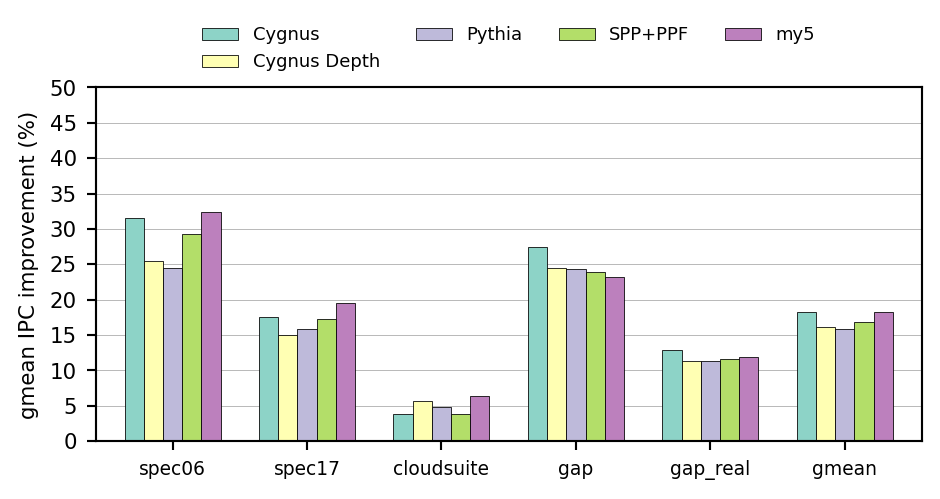

In [32]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='gmean IPC improvement (%)',
    ylim=(0, 50),
    ytick_distance=5,
    dpi=192, figsize=(5, 2.7))

### spec06

In [8]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,Cygnus Depth,Pythia,SPP+PPF,my5
GemsFDTD,55.760000,28.000000,26.500000,40.010000,63.630000
astar,6.720000,6.530000,6.410000,6.500000,2.080000
bwaves,116.950000,77.610000,67.260000,99.220000,62.510000
cactusADM,50.420000,44.990000,44.760000,49.580000,41.690000
gcc,28.690000,19.490000,17.760000,23.860000,25.320000
lbm,15.970000,17.110000,15.860000,18.150000,14.040000
leslie3d,43.680000,33.310000,29.670000,36.660000,43.150000
libquantum,85.580000,69.940000,96.030000,109.310000,115.760000
mcf,14.020000,14.340000,14.210000,9.120000,18.080000
milc,1.840000,1.590000,1.660000,10.750000,19.480000


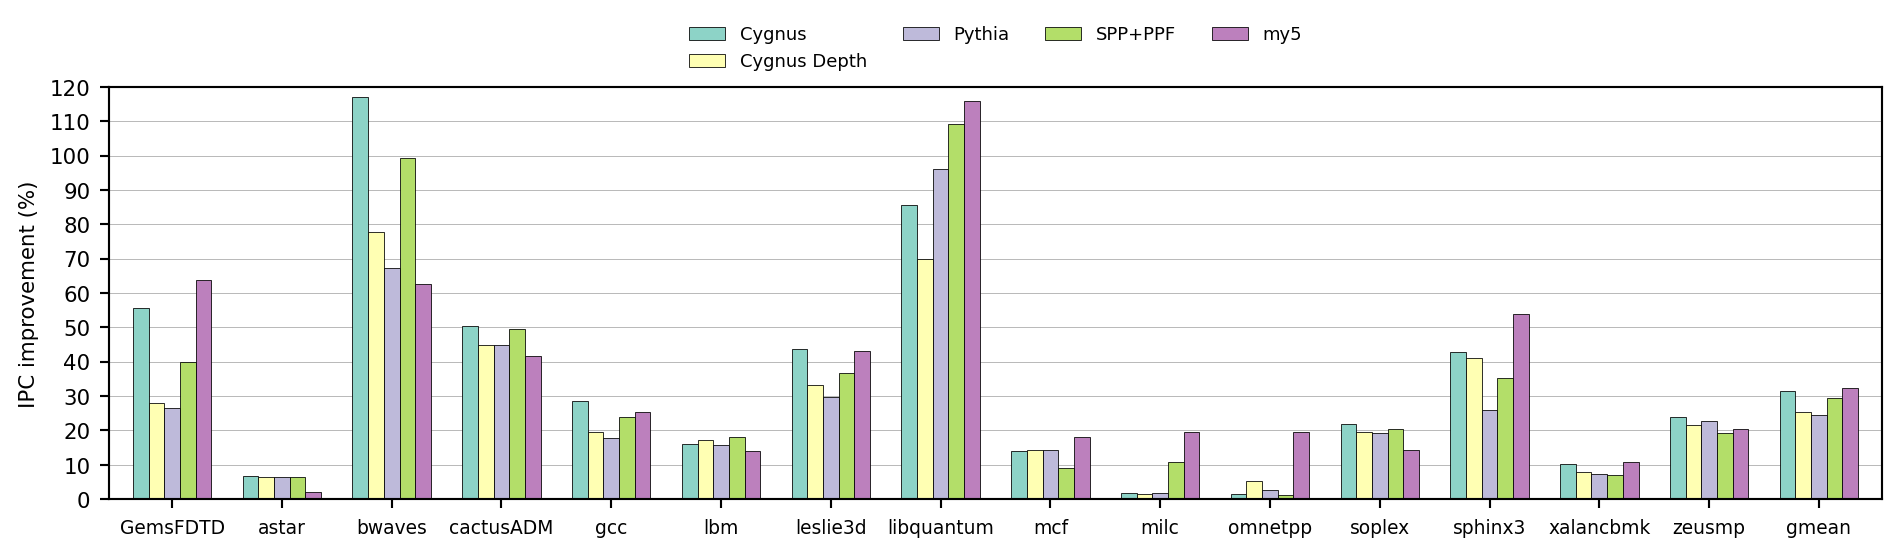

In [9]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='IPC improvement (%)',
    ylim=(0, 120),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))
# import matplotlib.pyplot as plt
# plt.savefig('../../cvs/papers/micro-23r/figures/results_summary.pdf')

### gap

In [10]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,Cygnus Depth,Pythia,SPP+PPF,my5
bc,13.360000,12.900000,12.880000,12.470000,11.890000
bfs,85.710000,65.160000,64.670000,67.510000,59.550000
cc,36.030000,34.720000,33.930000,34.460000,35.480000
pr,1.830000,1.790000,1.910000,1.400000,1.300000
sssp,11.600000,11.770000,11.480000,9.700000,7.710000
tc,31.810000,30.110000,30.220000,28.690000,32.040000
gmean,27.468543,24.469226,24.270144,23.949084,23.127684


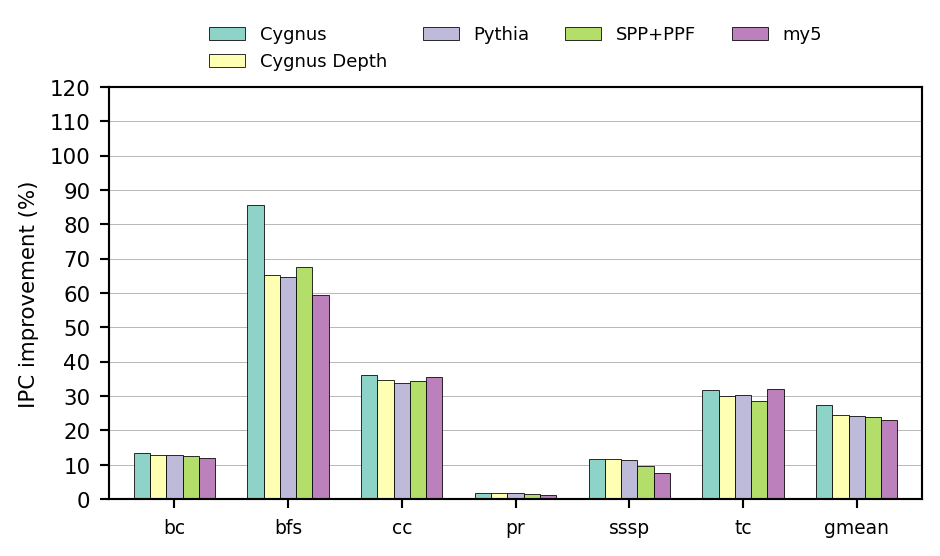

In [11]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='IPC improvement (%)',
    ylim=(0, 120),
    ytick_distance=10,
    dpi=192, figsize=(5, 3))
# import matplotlib.pyplot as plt
# plt.savefig('../../cvs/papers/micro-23r/figures/results_summary.pdf')

### gap_real

In [12]:
reload(plot)
pd.set_option('display.max_rows', 500)
plot.get_benchmark_table(
    degreedyn_1core_df, "gap_real", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus,Cygnus Depth,Pythia,SPP+PPF,my5
bc__amazon-2008.mtx,1.330000,2.130000,2.08000,2.010000,2.000000
bc__amazon0601.mtx,-1.100000,-1.000000,-0.99000,-0.160000,1.730000
bc__belgium_osm.mtx,3.890000,3.780000,3.85000,4.940000,2.440000
bc__citationCiteseer.mtx,-3.990000,-3.440000,-3.42000,1.770000,2.950000
bc__coAuthorsCiteseer.mtx,-0.810000,1.480000,1.44000,2.440000,2.420000
bc__coAuthorsDBLP.mtx,-1.130000,-0.010000,-0.13000,1.830000,2.590000
bc__coPapersCiteseer.mtx,11.990000,14.330000,14.34000,14.040000,14.010000
bc__coPapersDBLP.mtx,8.960000,12.250000,12.42000,11.170000,13.300000
bc__com-Youtube.mtx,-2.020000,-0.430000,-0.45000,1.550000,2.180000
bc__dblp-2010.mtx,4.530000,6.810000,6.71000,6.120000,4.290000


## IPC

In [14]:
degreedyn_1core_df_plus_baseline = {
    'Baseline':     studies['stu_prefetchers']['_baseline'],
    'Cygnus':       studies['stu_prefetchers']['pf_cygnus'],
    'Cygnus Depth': studies['stu_prefetchers']['pf_cygnus_depth'],
    'Pythia':       studies['stu_prefetchers']['pf_pythia'],
    #'Bingo':   studies['stu_prefetchers']['pf_bingo'],
    #'SMS':     studies['stu_prefetchers']['pf_sms'],
    #'SPP':     studies['stu_prefetchers']['pf_spp'],
    'SPP+PPF': studies['stu_prefetchers']['pf_spp_ppf'],
    #'MLOP':    studies['stu_prefetchers']['pf_mlop'],
    #'DSPatch': studies['stu_prefetchers']['pf_dspatch'],
    'my5':     studies['stu_prefetchers']['pf_my5'],
}

reload(plot)
plot.get_suite_table(
    degreedyn_1core_df_plus_baseline, "cpu.gmean.ipc",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,gap_real,gmean
Baseline,0.45,0.69,1.30,0.55,0.59,0.665954
Cygnus,0.59,0.81,1.35,0.70,0.67,0.787352
Cygnus Depth,0.56,0.79,1.37,0.68,0.66,0.770757
Pythia,0.56,0.80,1.36,0.68,0.66,0.771568
SPP+PPF,0.58,0.81,1.35,0.68,0.66,0.777786
my5,0.59,0.82,1.38,0.67,0.66,0.783489


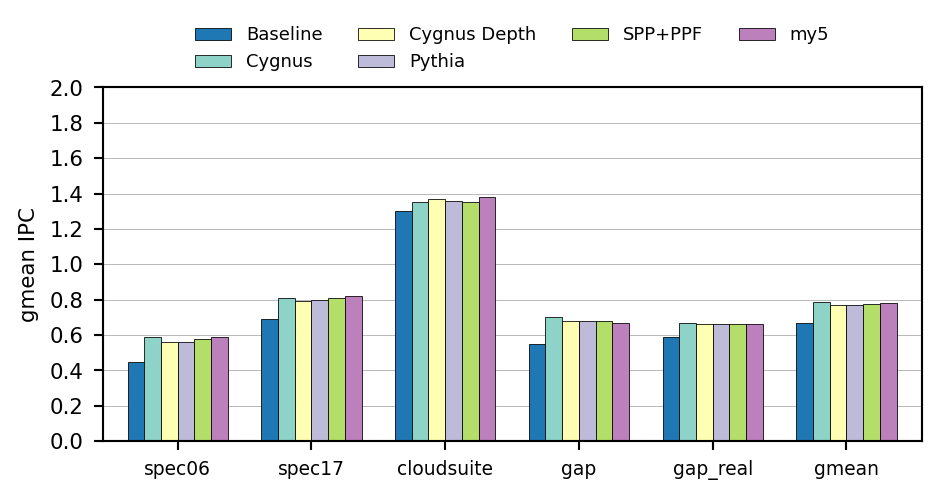

In [15]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df_plus_baseline, "cpu.gmean.ipc",
    suites=suites,
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='gmean IPC',
    ylim=(0, 2.0),
    ytick_distance=0.2,
    dpi=192, figsize=(5, 2.7))

### spec06

In [26]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df_plus_baseline, "spec06", "cpu.gmean.ipc",
    add_mean=True).T

,Baseline,Cygnus,Cygnus Depth,Pythia,SPP+PPF,my5
GemsFDTD,0.270000,0.410000,0.340000,0.340000,0.370000,0.430000
astar,0.400000,0.420000,0.420000,0.420000,0.420000,0.400000
bwaves,0.420000,0.920000,0.750000,0.710000,0.840000,0.690000
cactusADM,0.910000,1.370000,1.320000,1.320000,1.360000,1.290000
gcc,0.550000,0.710000,0.660000,0.650000,0.680000,0.690000
lbm,0.260000,0.300000,0.300000,0.300000,0.300000,0.290000
leslie3d,0.440000,0.630000,0.580000,0.570000,0.600000,0.620000
libquantum,0.410000,0.760000,0.700000,0.800000,0.860000,0.890000
mcf,0.070000,0.080000,0.080000,0.080000,0.080000,0.080000
milc,0.560000,0.570000,0.570000,0.570000,0.620000,0.670000


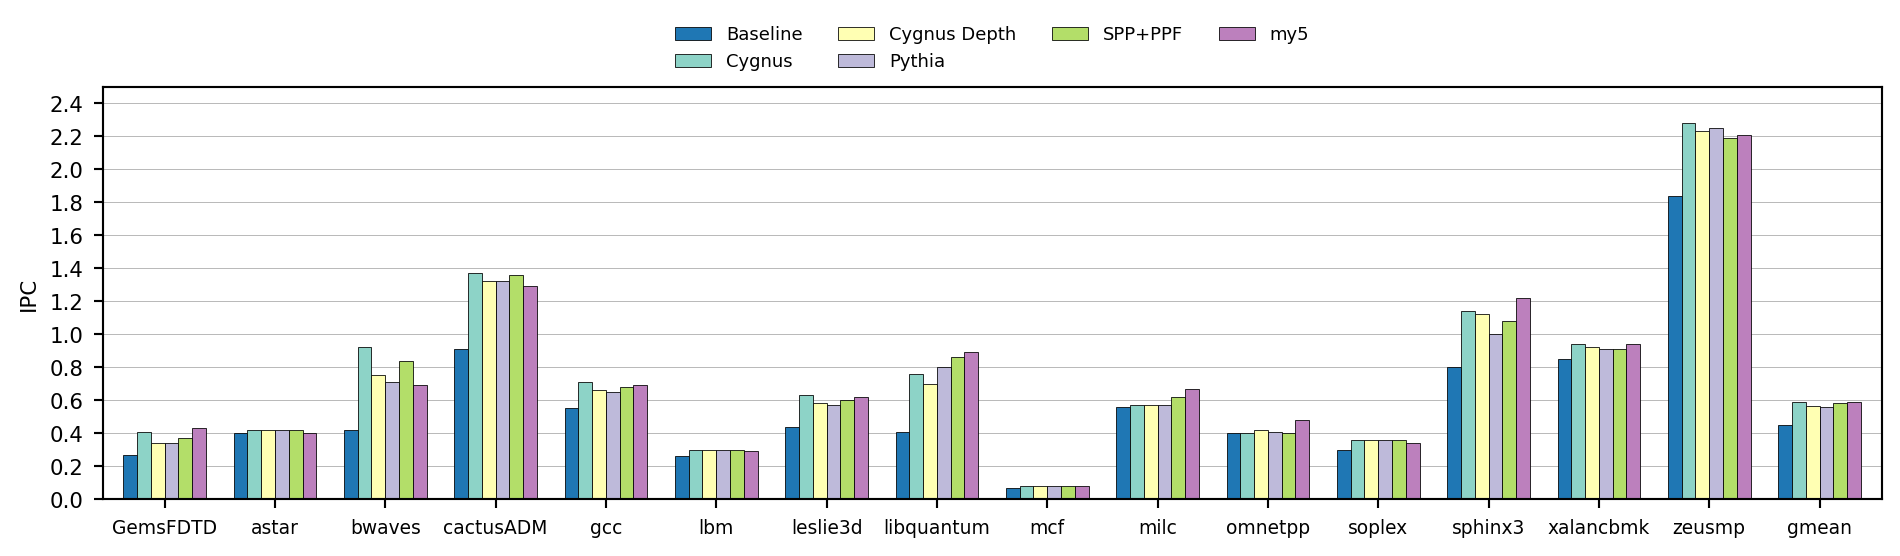

In [25]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df_plus_baseline, "spec06", "cpu.gmean.ipc",
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='IPC',
    ylim=(0, 2.5),
    ytick_distance=0.2,
    dpi=192, figsize=(10, 3))

## L2C accuracy

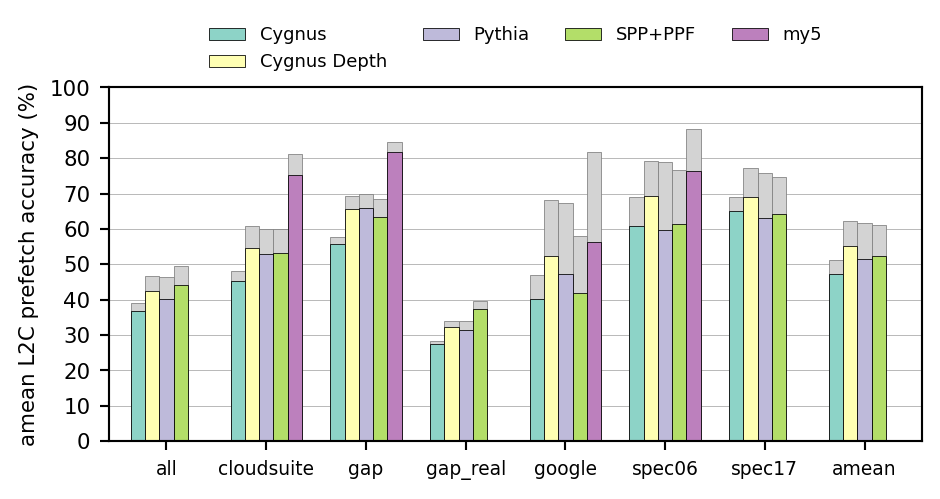

In [16]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df, "cache.L2C.amean.pf_timely_accuracy",
    secondary_statistic_name="cache.L2C.amean.pf_accuracy",
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='amean L2C prefetch accuracy (%)',
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(5, 2.7))

### spec06

In [17]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.pf_accuracy",
    add_mean=True).T

,Cygnus,Cygnus Depth,Pythia,SPP+PPF,my5
GemsFDTD,83.900000,92.170000,92.660000,89.130000,96.370000
astar,44.930000,60.090000,58.310000,52.320000,78.450000
bwaves,98.470000,99.190000,99.440000,99.350000,99.900000
cactusADM,99.580000,99.770000,99.920000,99.770000,99.790000
gcc,35.240000,57.620000,57.350000,53.030000,73.200000
lbm,99.920000,99.990000,99.990000,99.960000,100.000000
leslie3d,93.920000,95.100000,97.800000,96.240000,97.360000
libquantum,99.990000,100.000000,100.000000,100.000000,100.000000
mcf,47.820000,48.120000,47.930000,47.780000,84.790000
milc,56.710000,85.300000,83.160000,86.950000,99.940000


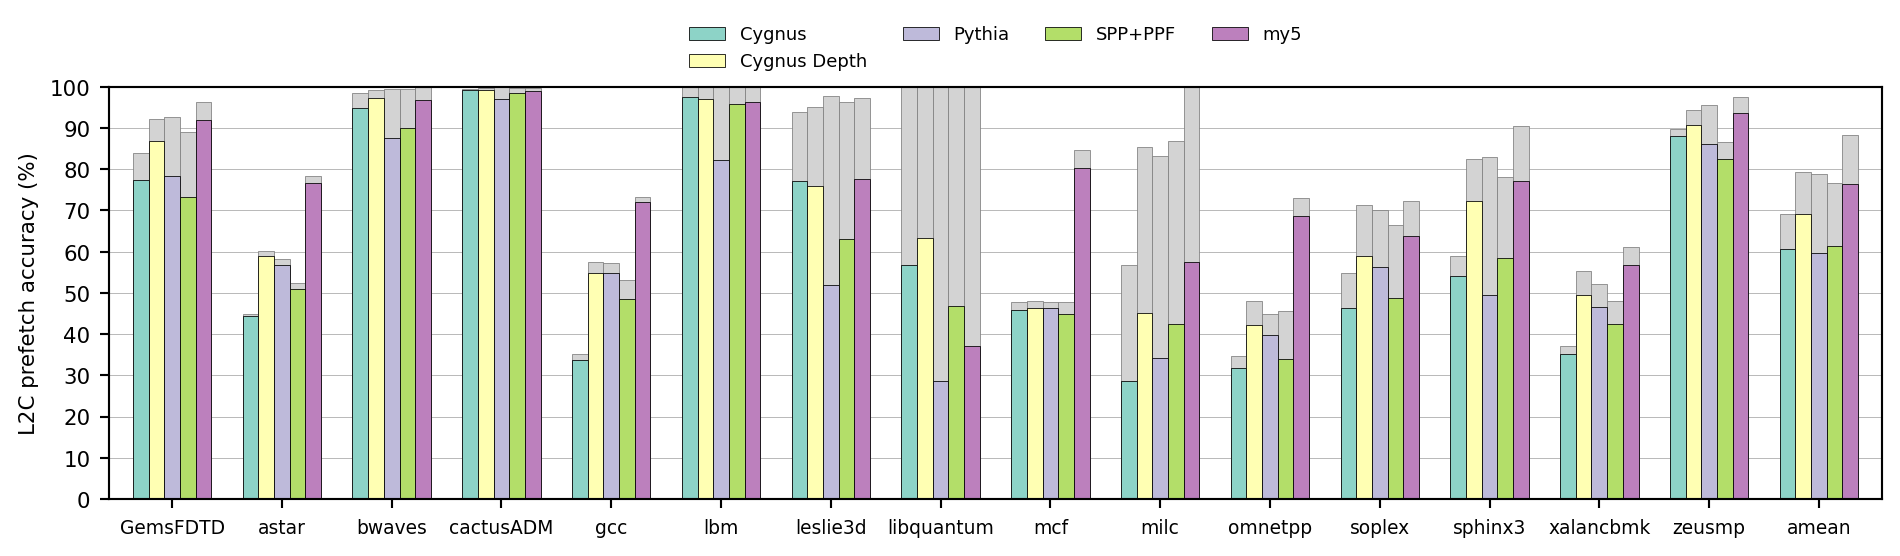

In [18]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.pf_timely_accuracy",
    secondary_statistic_name="cache.L2C.amean.pf_accuracy",
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='L2C prefetch accuracy (%)',
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))


## L2C coverage

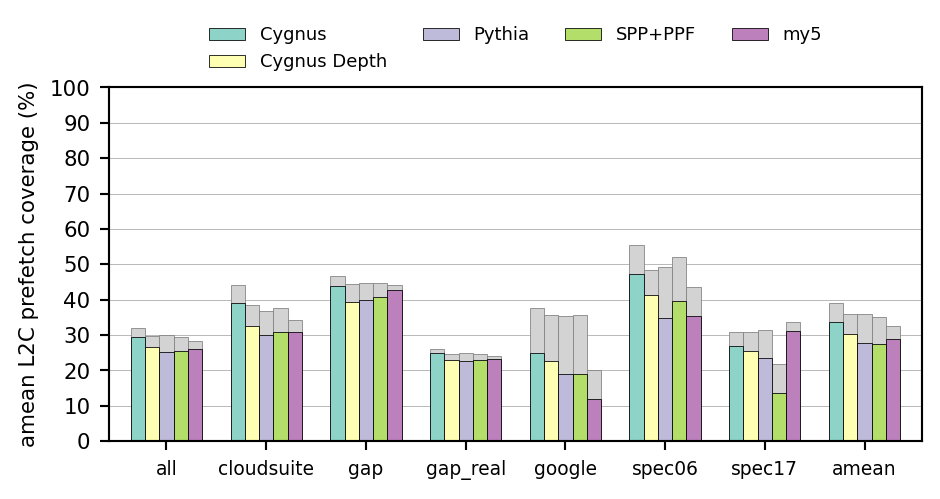

In [19]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df, "cache.L2C.amean.pf_coverage",
    secondary_statistic_name="cache.L2C.amean.pf_untimely_coverage",
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='amean L2C prefetch coverage (%)',
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(5, 2.7))

### spec06

In [20]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.pf_coverage",
    add_mean=True).T

,Cygnus,Cygnus Depth,Pythia,SPP+PPF,my5
GemsFDTD,80.21,73.120000,71.31,73.970000,65.300
astar,14.82,15.460000,14.88,17.140000,13.510
bwaves,66.19,55.480000,45.79,65.110000,30.080
cactusADM,68.12,63.530000,61.38,67.420000,42.600
gcc,38.94,27.950000,25.95,32.130000,31.010
lbm,23.68,20.120000,19.25,23.280000,23.580
leslie3d,56.77,51.220000,35.99,45.980000,46.070
libquantum,54.04,53.250000,27.11,44.310000,35.090
mcf,29.25,30.110000,29.90,11.520000,23.180
milc,26.18,23.930000,17.72,25.540000,26.880


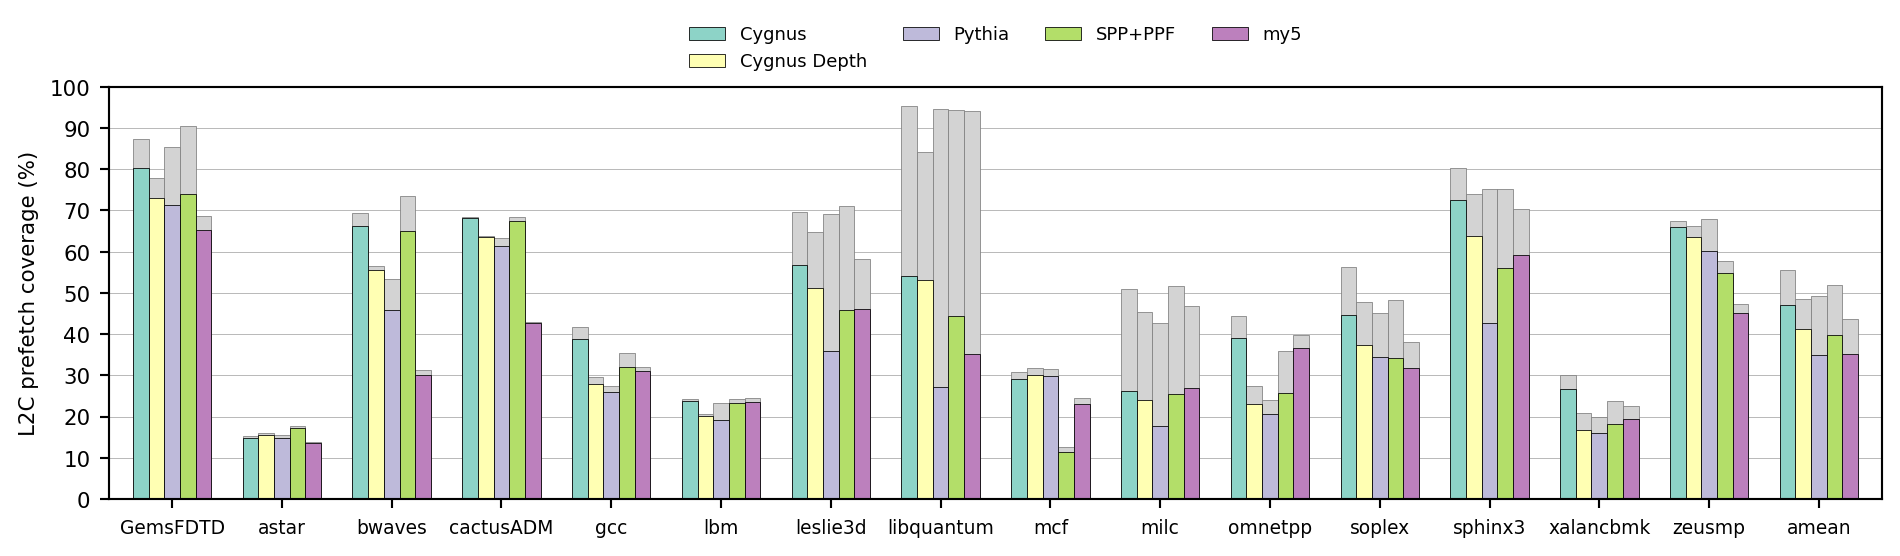

In [21]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.pf_coverage",
    secondary_statistic_name="cache.L2C.amean.pf_untimely_coverage",
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel='L2C prefetch coverage (%)',
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))